In [1]:
import numpy
print('numpy version{}'.format(numpy.__version__))
import pandas
print("pandas version{}".format(pandas.__version__))
import scipy
print("scipy version{}".format(scipy.__version__))
import sys
print("sys version{}".format(sys.version))
import matplotlib
print("matplotlib version{}".format(matplotlib.__version__))
import sklearn
print("sklearn version{}".format(sklearn.__version__))

numpy version1.15.4
pandas version0.24.1
scipy version1.2.0
sys version3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
matplotlib version2.2.3
sklearn version0.20.2


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("titanic_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NAN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NAN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NAN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.shape

(891, 12)

In [10]:
df = df.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
print(df.groupby('Survived').count())

          Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
Survived                                                
0            549  549  549    549    549   549       549
1            342  342  342    342    342   342       342


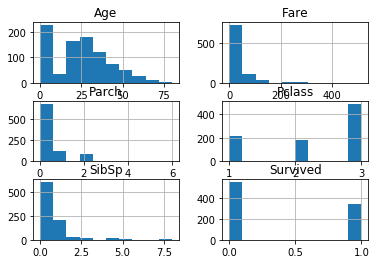

In [14]:
df.hist()
plt.show()

In [15]:
import pandas.plotting
from pandas.plotting import scatter_matrix

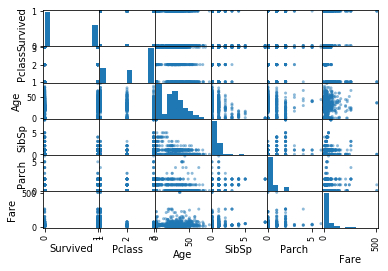

In [16]:
scatter_matrix(df)
plt.show()

In [17]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [23]:
#def wrangle(df):
embarked_separate_port = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_separate_port], axis=1)
df.drop('Embarked', axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_NAN,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1
5,0,3,0,0.0,0,0,8.4583,0,0,1,0
6,0,1,0,54.0,0,0,51.8625,0,0,0,1
7,0,3,0,2.0,3,1,21.0750,0,0,0,1
8,1,3,1,27.0,0,2,11.1333,0,0,0,1
9,1,2,1,14.0,1,0,30.0708,1,0,0,0


In [33]:
df=df.drop('Embarked',axis=1)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_NAN,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [35]:
array=df.values

In [36]:
x=array[:,0:10]
y=array[:,0]
validation_size=0.20
seed=7
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)


In [37]:
seed=7
scoring='accuracy'


In [38]:
from sklearn.model_selection import KFold

In [44]:
models=[]
models.append(('Linear R',LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision T',DecisionTreeClassifier()))
models.append(('Naive b',GaussianNB()))
models.append(('SVM',SVC(gamma="auto")))
models.append(('RandomForest',RandomForestClassifier(n_estimators=445)))
results=[]
names=[]
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model,x_train,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Linear R: 1.000000 (0.000000)
KNN: 0.712344 (0.085779)
Decision T: 1.000000 (0.000000)
Naive b: 1.000000 (0.000000)
SVM: 0.793662 (0.065597)
RandomForest: 1.000000 (0.000000)


In [47]:
clf=GaussianNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_validation)
print("accuracy score:",accuracy_score(y_validation,pred))
print(confusion_matrix(y_validation,pred))
print(classification_report(y_validation,pred))

accuracy score: 1.0
[[110   0]
 [  0  69]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

